In [ ]:
import pandas as pd
df =pd.read_csv("/AISafety_EMOTIONS.csv")

In [2]:
THEME_TO_DIMENSION = {
    "Addiction, Dependency and Relational Displacement": "Self-Regulation Difficulties",
    "Relapse, Recovery and Peer/Clinical Support": "Self-Regulation Difficulties",
    "Coping Strategies, Harm-Reduction and Self-Help": "Self-Regulation Difficulties",
    "Mental-Health Harms and Harmful Outputs": "Self-Regulation Difficulties",

    "Alignment, Existential and Agentic Risks": "Autonomy and Sense of Control",
    "Privacy, Data Exploitation and Account Control": "Autonomy and Sense of Control",

    "Philosophical, Conceptual and Narrative Framing": "Sensemaking and Meaning-Making",
    "Creative, Cultural and Media Expressions": "Sensemaking and Meaning-Making",

    "Economic and Social Disruption": "Social Influence and Risk Amplification",
    "Community Moderation, Resources and Public Distribution": "Social Influence and Risk Amplification",
    "Misinformation, Deepfakes and Epistemic Risks": "Social Influence and Risk Amplification",

    "Technical Safety, Research and Engineering Concerns": "Technical Risk and Psychological Recovery",
    "Platform Safety, Operational Failures and Incident Response": "Technical Risk and Psychological Recovery",
    "Ethics, Governance and Policy Advocacy": "Technical Risk and Psychological Recovery"
}


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_dimension_distribution(df):
    df = df.copy()
    df["dimension"] = df["primary_theme"].map(THEME_TO_DIMENSION)

    order = df["dimension"].value_counts().index

    plt.figure(figsize=(8,5))
    sns.countplot(
        data=df,
        y="dimension",
        order=order,
        color="#4C72B0"
    )
    plt.xlabel("Post Count")
    plt.ylabel("")
    plt.title("Distribution of Experiential Dimensions")
    sns.despine()
    plt.tight_layout()
    plt.show()


In [4]:
import numpy as np
import pandas as pd

EMOTIONS = ["anger","disgust","fear","joy","neutral","sadness","surprise"]

def plot_dimension_emotion_heatmap(df):
    df = df.copy()
    df["dimension"] = df["primary_theme"].map(THEME_TO_DIMENSION)
    df["dominant_emotion"] = df[EMOTIONS].idxmax(axis=1)

    heat = (
        df.groupby(["dimension","dominant_emotion"])
          .size()
          .unstack(fill_value=0)
    )
    heat = heat.div(heat.sum(axis=1), axis=0)

    plt.figure(figsize=(10,5))
    sns.heatmap(
        heat,
        cmap="coolwarm",
        annot=True,
        fmt=".2f"
    )
    plt.title("Emotion Signature by Experiential Dimension")
    plt.ylabel("")
    plt.xlabel("Emotion")
    plt.tight_layout()
    plt.show()


In [5]:
from collections import Counter
import pandas as pd

def plot_phrase_frequency(df, top_k=10):
    df = df.copy()
    df["dimension"] = df["primary_theme"].map(THEME_TO_DIMENSION)

    rows = []
    for _, r in df.iterrows():
        if isinstance(r["label_phrases"], list):
            for p in r["label_phrases"]:
                rows.append((r["dimension"], p))

    phrase_df = pd.DataFrame(rows, columns=["dimension","phrase"])

    top_phrases = (
        phrase_df.groupby("dimension")["phrase"]
        .apply(lambda x: Counter(x).most_common(top_k))
    )

    for dim, phrases in top_phrases.items():
        print(f"\n🔹 {dim}")
        for p, c in phrases:
            print(f"  {p} ({c})")


In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import entropy

EMOTIONS = ["anger","disgust","fear","joy","neutral","sadness","surprise"]

def plot_emotion_polarization(df):
    df = df.copy()
    df["dimension"] = df["primary_theme"].map(THEME_TO_DIMENSION)

    def row_entropy(row):
        vals = row[EMOTIONS].astype(float).values  
        vals = np.clip(vals, 1e-12, None)          
        vals = vals / vals.sum()                   
        return entropy(vals, base=2)

    df["emotion_entropy"] = df.apply(row_entropy, axis=1)

    plt.figure(figsize=(8,5))
    sns.boxenplot(
        data=df,
        x="emotion_entropy",
        y="dimension",
        color="#DD8452"
    )
    plt.title("Emotion Polarization Across Experiential Dimensions")
    plt.xlabel("Emotion Entropy (bits)")
    plt.ylabel("")
    sns.despine()
    plt.tight_layout()
    plt.show()


In [7]:
def plot_narrative_depth(df):
    df = df.copy()
    df["dimension"] = df["primary_theme"].map(THEME_TO_DIMENSION)

    plt.figure(figsize=(8,5))
    sns.boxenplot(
        data=df,
        x="word_count",
        y="dimension",
        color="#55A868"
    )
    plt.title("Narrative Depth by Experiential Dimension")
    plt.xlabel("Word Count")
    plt.ylabel("")
    sns.despine()
    plt.tight_layout()
    plt.show()


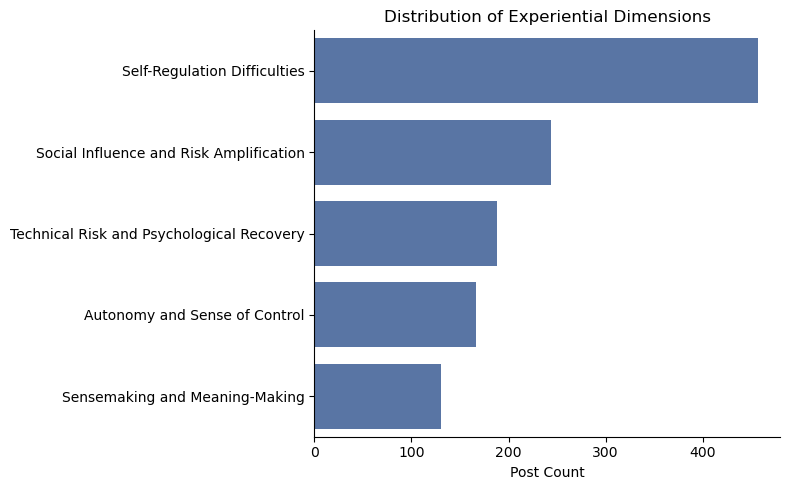

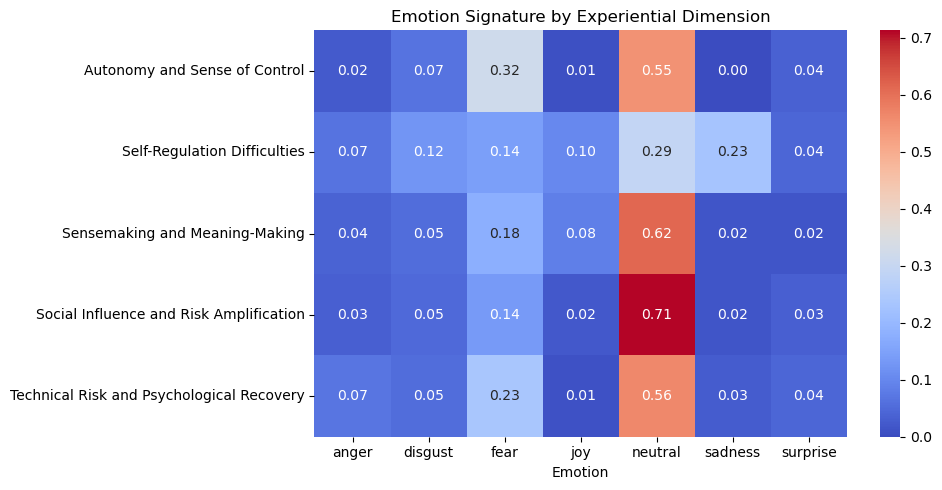

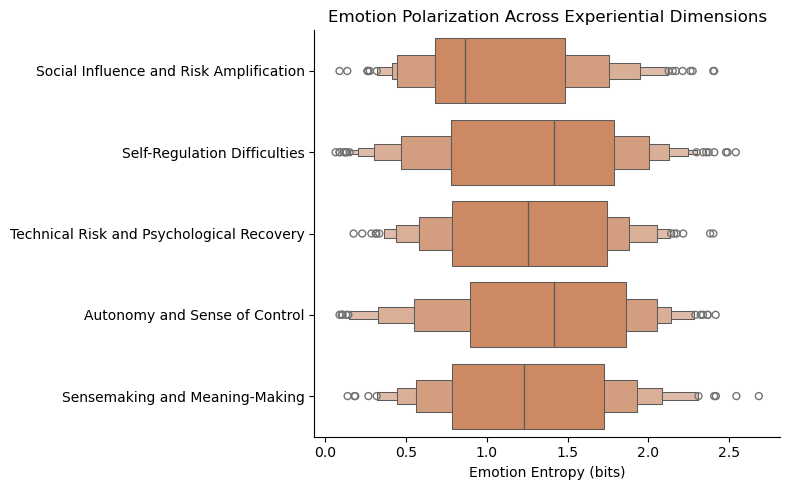

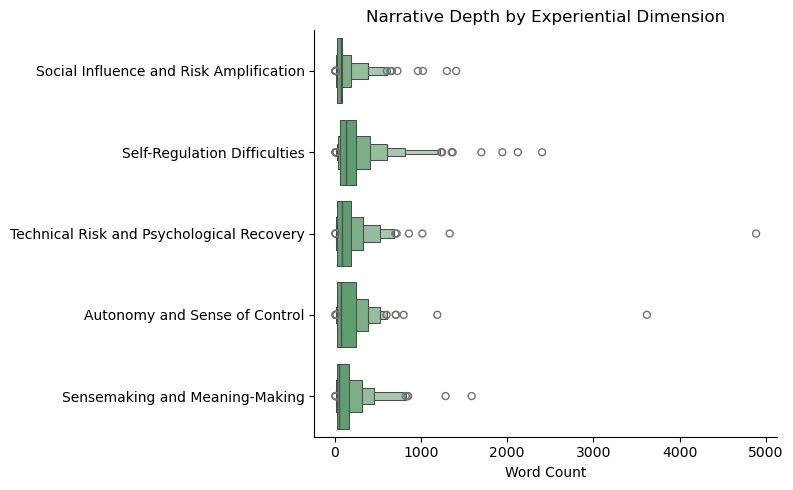

In [10]:
plot_dimension_distribution(df)
plot_dimension_emotion_heatmap(df)
plot_phrase_frequency(df)
plot_emotion_polarization(df)
plot_narrative_depth(df)
theme_counts = df["primary_theme"].value_counts().reset_index()

In [11]:
EMOTIONS = ["anger","disgust","fear","joy","neutral","sadness","surprise"]


In [17]:
import numpy as np
import matplotlib.pyplot as plt

NON_NEUTRAL_EMOTIONS = [
    "anger",
    "disgust",
    "fear",
    "joy",
    "sadness",
    "surprise"
]

DIMENSION_COLORS = {
    "Self-Regulation Difficulties": "#D55E00",
    "Autonomy and Sense of Control": "#0072B2",
    "Sensemaking and Meaning-Making": "#009E73",
    "Social Influence and Risk Amplification": "#CC79A7",
    "Technical Risk and Psychological Recovery": "#56B4E9"
}

def plot_non_neutral_emotion_radar_by_dimension(df):
    df = df.copy()
    df["dimension"] = df["primary_theme"].map(THEME_TO_DIMENSION)

    mean_emotion = (
        df.groupby("dimension")[NON_NEUTRAL_EMOTIONS]
        .mean()
    )

    categories = NON_NEUTRAL_EMOTIONS
    N = len(categories)

    angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(
        figsize=(7.5, 7.5),
        subplot_kw=dict(polar=True)
    )

    for dim, row in mean_emotion.iterrows():
        values = row.values.tolist()
        values += values[:1]

        color = DIMENSION_COLORS.get(dim, "#333333")

        ax.plot(
            angles,
            values,
            linewidth=2.5,
            color=color,
            label=dim
        )
        ax.fill(
            angles,
            values,
            color=color,
            alpha=0.18
        )

    # ---- Aesthetic tuning ----
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)

    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(
        categories,
        fontsize=11,
        fontweight="medium"
    )

    ax.set_rlabel_position(0)
    ax.set_yticks([0.05, 0.10, 0.20, 0.30])
    ax.set_yticklabels(
        ["0.05", "0.10", "0.20", "0.30"],
        fontsize=9
    )

    ax.set_ylim(0, mean_emotion.values.max() * 1.25)

    ax.grid(color="gray", alpha=0.25, linewidth=0.8)

    ax.set_title(
        "Non-Neutral Affective Profiles Across Experiential Dimensions",
        y=1.12,
        fontsize=14,
        fontweight="semibold"
    )

    ax.legend(
        loc="upper right",
        bbox_to_anchor=(1.45, 1.12),
        frameon=False,
        fontsize=10
    )

    plt.tight_layout()
    plt.show()


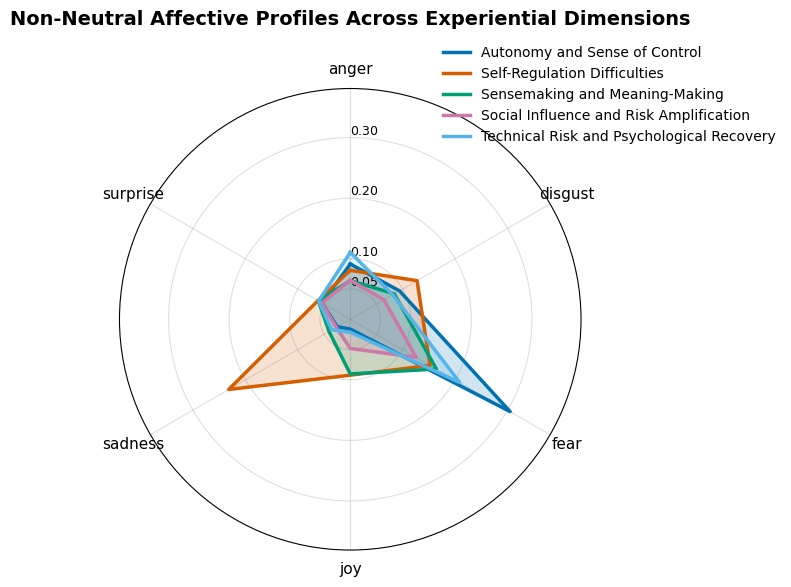

In [18]:
plot_non_neutral_emotion_radar_by_dimension(df)


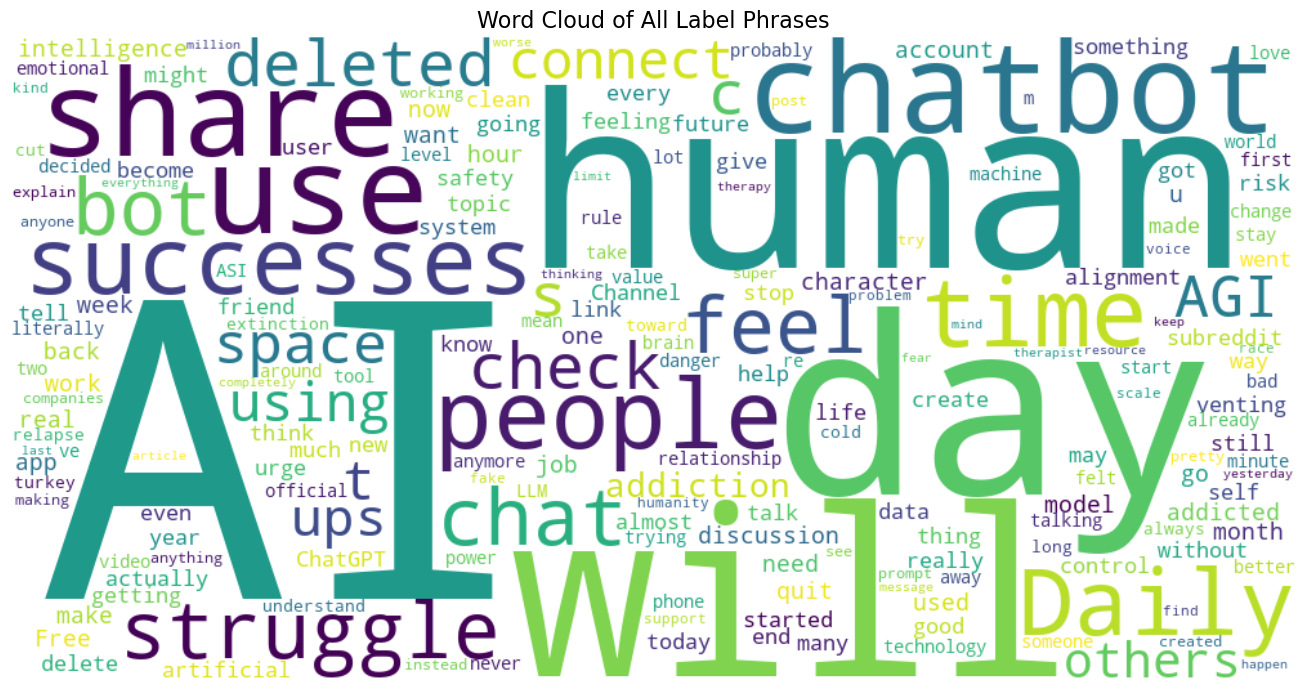

In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import ast

df = df[df['label_phrases'].notna()].copy()



all_phrases = df.explode('label_phrases')['label_phrases'].tolist()


text_blob = " | ".join(all_phrases)


wordcloud = WordCloud(
    width=1000,
    height=500,
    background_color='white',
    collocations=False,  
    prefer_horizontal=1.0,
).generate(text_blob)


plt.figure(figsize=(14, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of All Label Phrases", fontsize=16)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import defaultdict
import ast


THEME_TO_DIMENSION = {
    "Addiction, Dependency and Relational Displacement": "Self-Regulation Difficulties",
    "Relapse, Recovery and Peer/Clinical Support": "Self-Regulation Difficulties",
    "Coping Strategies, Harm-Reduction and Self-Help": "Self-Regulation Difficulties",
    "Mental-Health Harms and Harmful Outputs": "Self-Regulation Difficulties",
    "Alignment, Existential and Agentic Risks": "Autonomy and Sense of Control",
    "Privacy, Data Exploitation and Account Control": "Autonomy and Sense of Control",
    "Philosophical, Conceptual and Narrative Framing": "Sensemaking and Meaning-Making",
    "Creative, Cultural and Media Expressions": "Sensemaking and Meaning-Making",
    "Economic and Social Disruption": "Social Influence and Risk Amplification",
    "Community Moderation, Resources and Public Distribution": "Social Influence and Risk Amplification",
    "Misinformation, Deepfakes and Epistemic Risks": "Social Influence and Risk Amplification",
    "Technical Safety, Research and Engineering Concerns": "Technical Risk and Psychological Recovery",
    "Platform Safety, Operational Failures and Incident Response": "Technical Risk and Psychological Recovery",
    "Ethics, Governance and Policy Advocacy": "Technical Risk and Psychological Recovery"
}


def safe_eval(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except Exception:
        return []

df['label_phrases'] = df['label_phrases'].apply(safe_eval)


df['dimension'] = df['primary_theme'].map(THEME_TO_DIMENSION)
exploded = df.explode('label_phrases')


from pathlib import Path
output_dir = Path("wordcloud_output")
output_dir.mkdir(exist_ok=True)

for dim in exploded['dimension'].dropna().unique():
    phrases = exploded[exploded['dimension'] == dim]['label_phrases'].dropna().tolist()
    text_blob = " | ".join(phrases)

    wc = WordCloud(
        width=1000,
        height=600,
        background_color='white',
        colormap='Set2',
        prefer_horizontal=1.0,
        collocations=False,
        max_words=100
    ).generate(text_blob)

 
    plt.figure(figsize=(10, 6))
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f"Word Cloud: {dim}", fontsize=16)
    plt.axis('off')
    plt.tight_layout()

   
    wc.to_file(output_dir / f"wordcloud_{dim.replace(' ', '_')}.png")

plt.close('all')
